# Classification Problem Statement In Python Using Pandas and Numpy

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of , Electrical vehicle population data : https://www.kaggle.com/datasets/gunapro/electric-vehicle-population-data/data /) openly available on : 

#### All Vehicle population data

# Import important library to Preprocess and modelling the data

In [2]:
# IMPORT HERE!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
%matplotlib inline

# Imported the data from Kaggele Vehicle Population Data

In [26]:
vehicle = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [25]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130446 entries, 0 to 130445
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130446 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  float64
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [6]:
vehicle.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [28]:
# Convert 'Model Year' column to datetime format
vehicle['Model Year'] = pd.to_datetime(vehicle['Model Year'], format='%Y')

# Identify the null points and Duplicate Values

In [7]:
vehicle.isnull().sum()

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  3
Postal Code                                            6
Model Year                                             3
Make                                                   3
Model                                                225
Electric Vehicle Type                                  3
Clean Alternative Fuel Vehicle (CAFV) Eligibility      3
Electric Range                                         3
Base MSRP                                              3
Legislative District                                 308
DOL Vehicle ID                                         3
Vehicle Location                                      36
Electric Utility                                       6
2020 Census Tract                                      3
dtype: int64

In [8]:
vehicle.duplicated().sum()

0

In [9]:
vehicle.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,14.0,141151601.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021.0,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,23.0,171566447.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,36.0,9426525.0,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,36.0,211807760.0,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,22.0,185810306.0,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [10]:
vehicle.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,130440.0,9.816763e+04,2.492198e+03,1.730000e+03,9.805200e+04,9.812100e+04,9.837000e+04,9.970100e+04
Model Year,130443.0,2.019555e+03,2.989137e+00,1.997000e+03,2.018000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,130443.0,7.670572e+01,9.942157e+01,0.000000e+00,0.000000e+00,2.300000e+01,1.510000e+02,3.370000e+02
Base MSRP,130443.0,1.495677e+03,9.844748e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,130138.0,2.957703e+01,1.476751e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,130443.0,2.051796e+08,8.710573e+07,4.385000e+03,1.568004e+08,2.034934e+08,2.290791e+08,4.792548e+08
2020 Census Tract,130443.0,4.236244e+11,8.764855e+13,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,2.763920e+16


# Plot Histogram For Model Year Column

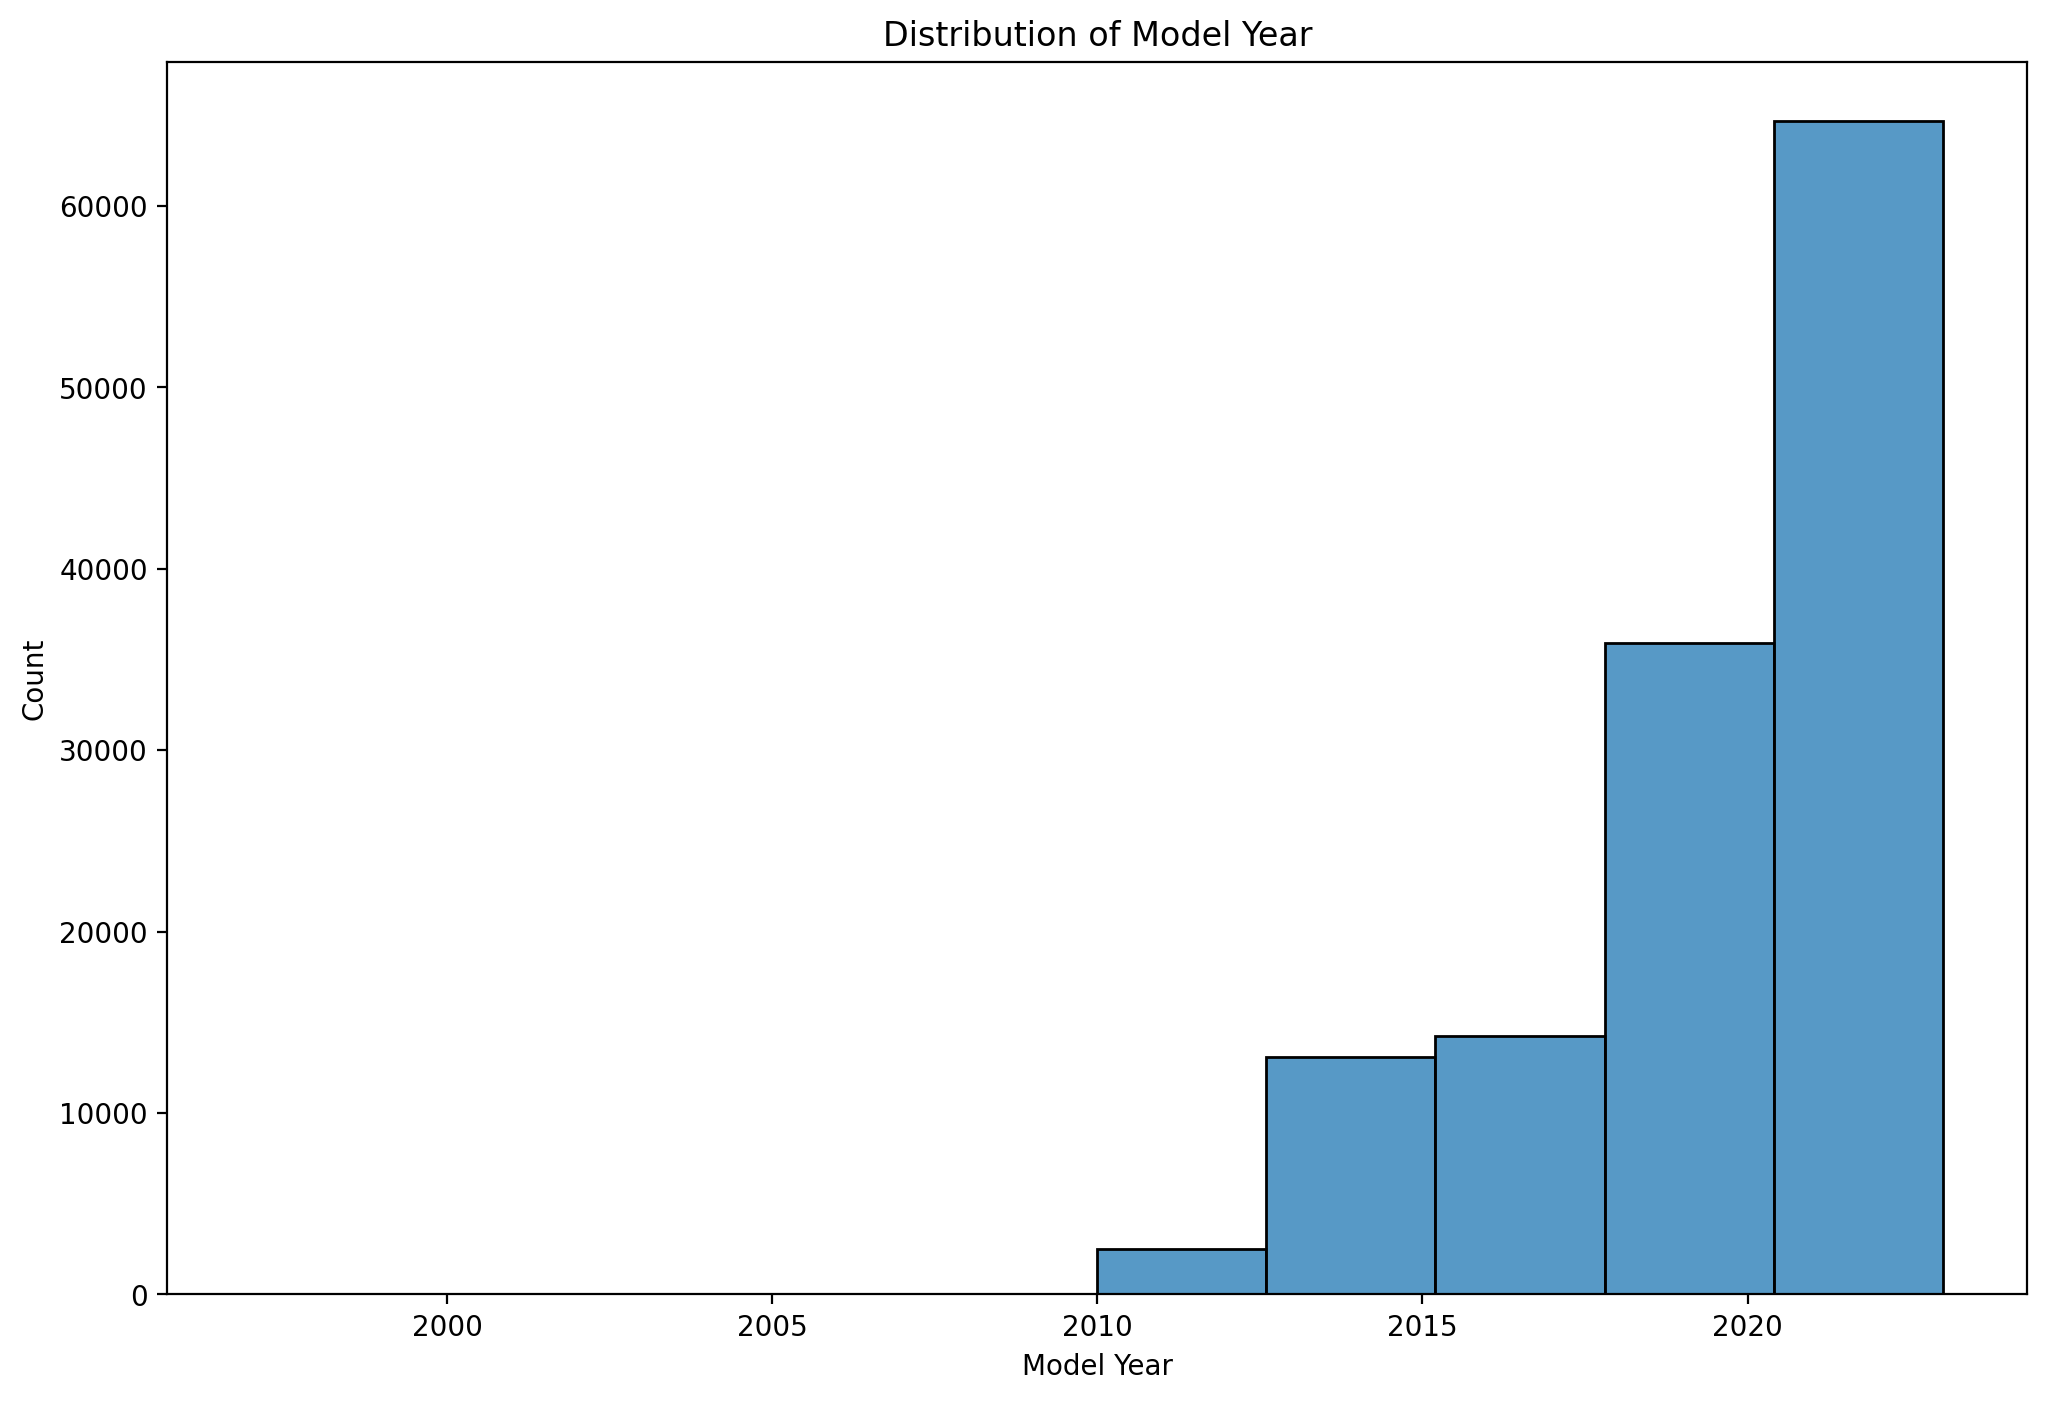

In [11]:
plt.figure(figsize=(12,8),dpi =200)
sb.histplot(data=vehicle, x='Model Year', bins=10)
plt.title('Distribution of Model Year')
plt.show()

# Plot Histogram For Country

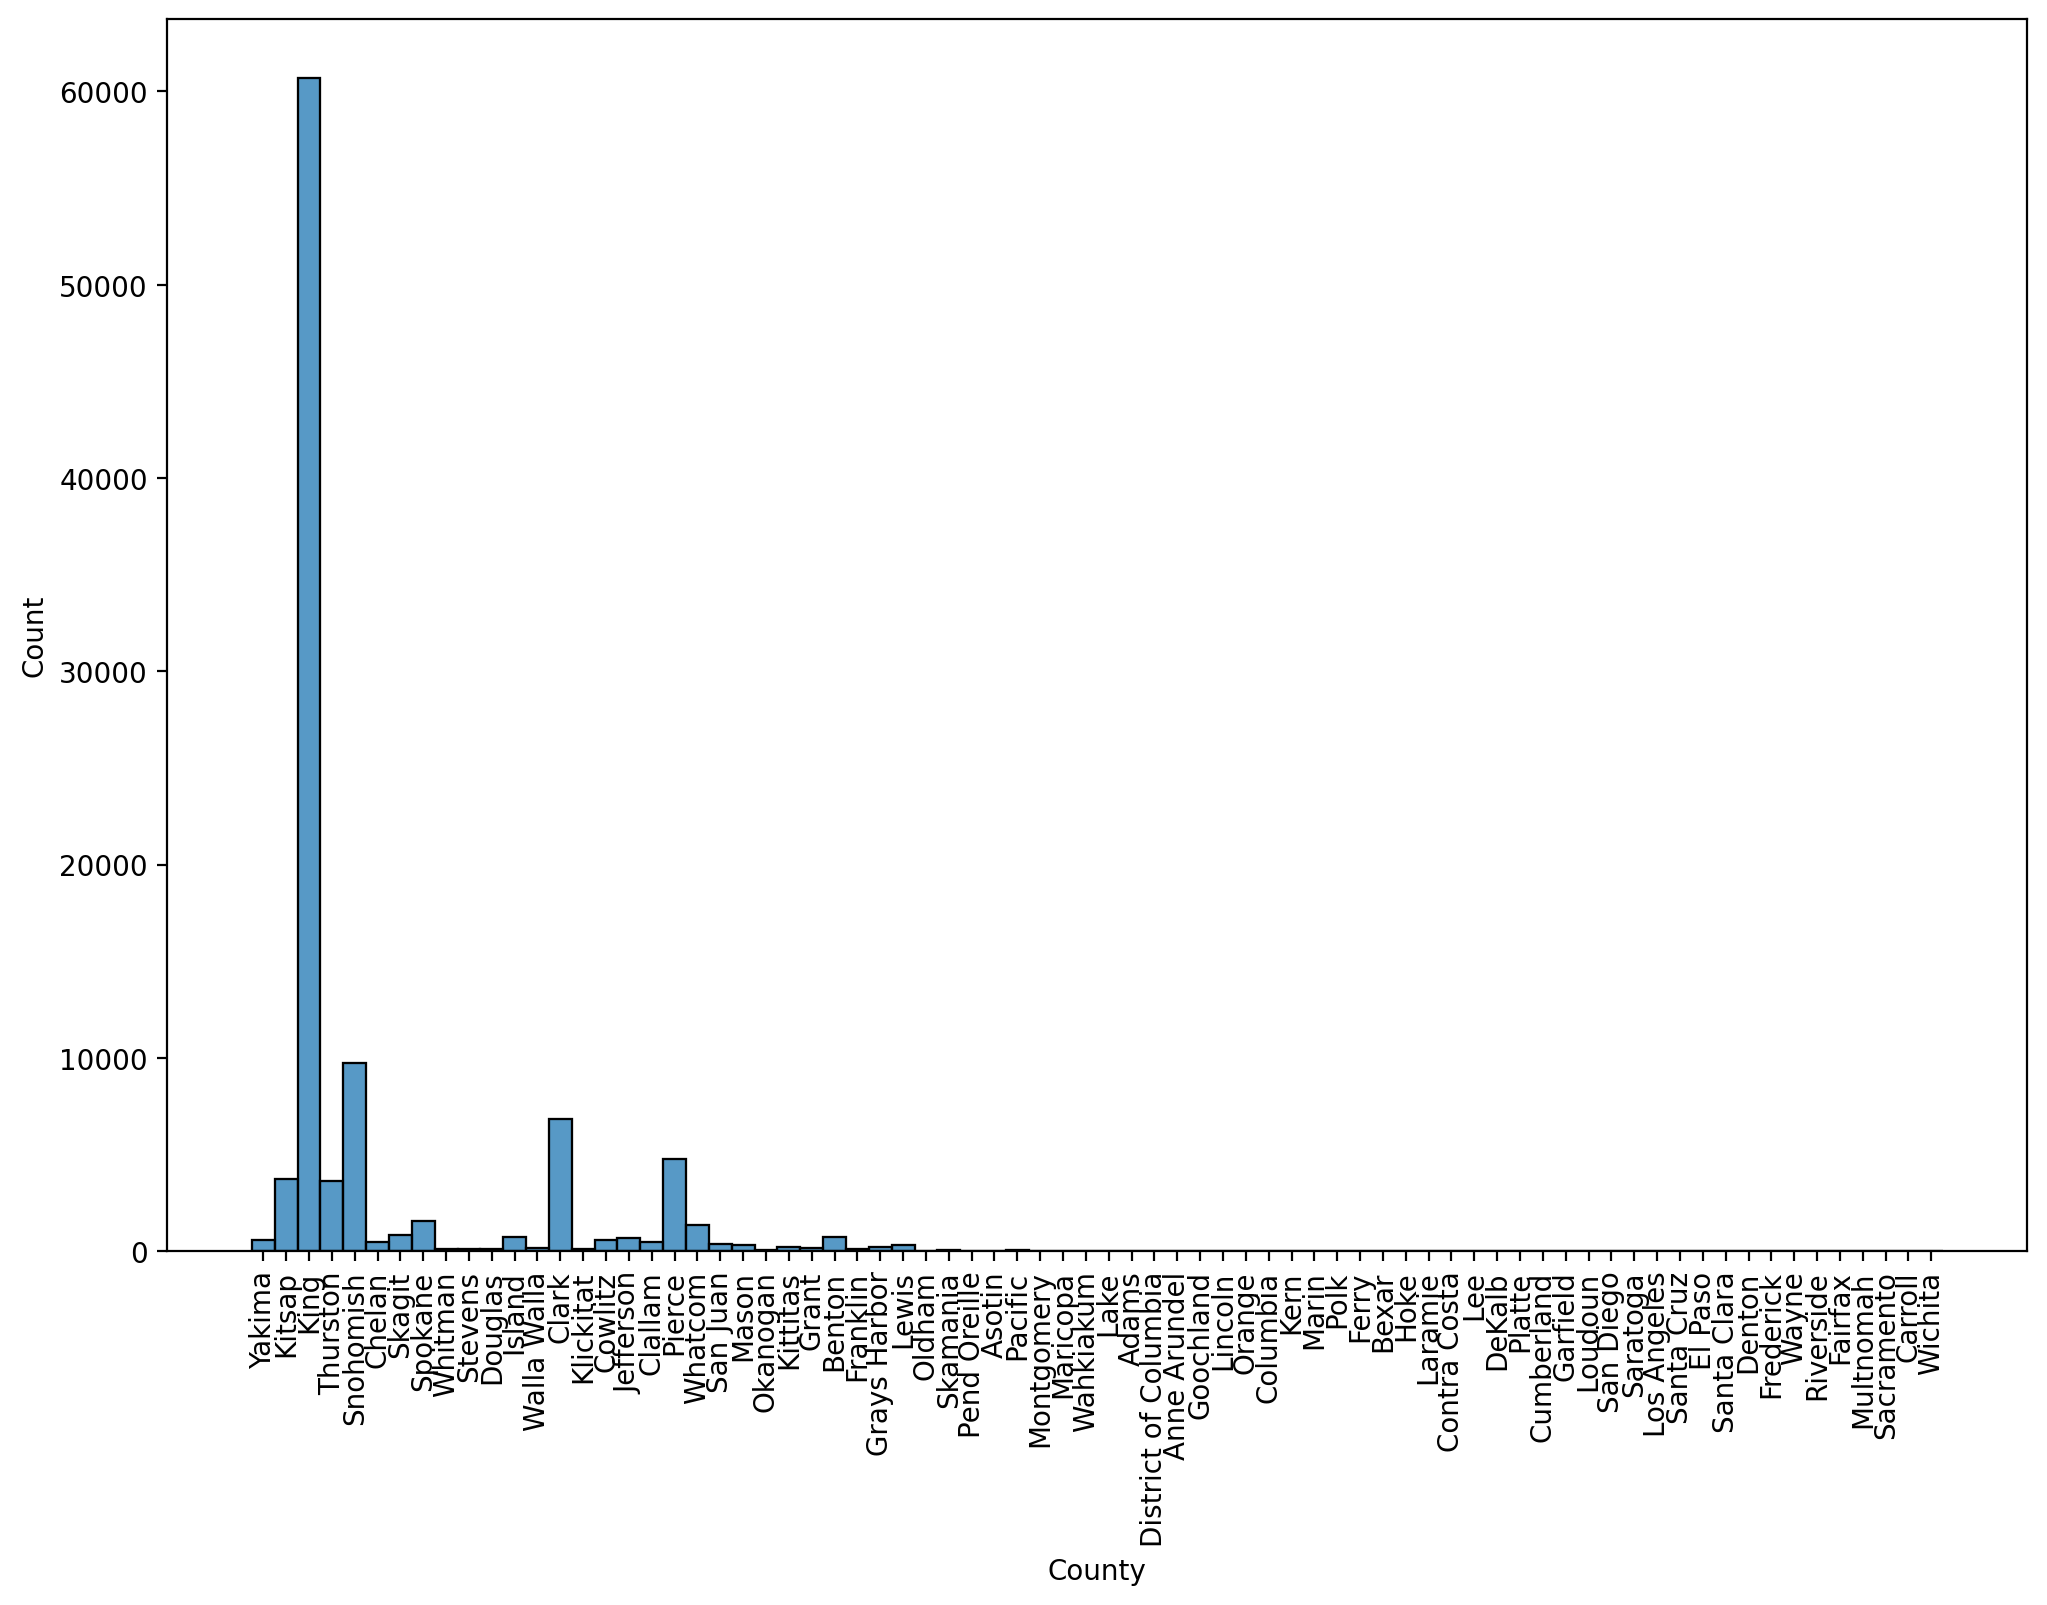

In [12]:
plt.figure(figsize=(12,8),dpi=200)
sb.histplot(vehicle['County'][0:100000])
plt.xticks(rotation ="vertical")
plt.show()

# Plot a bar chart of vehicle counts by Electric Vehicle Type

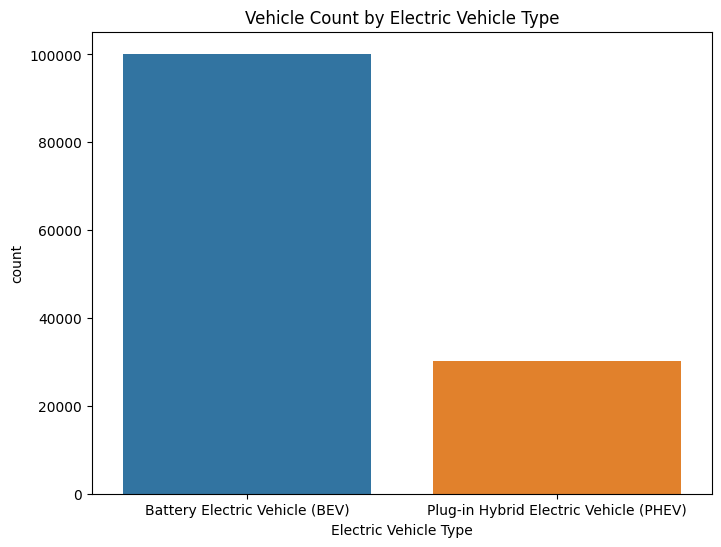

In [13]:
plt.figure(figsize=(8, 6))
sb.countplot(data=vehicle, x='Electric Vehicle Type')
plt.title('Vehicle Count by Electric Vehicle Type')
plt.show()

# Plot a bar chart of vehicle counts by Make

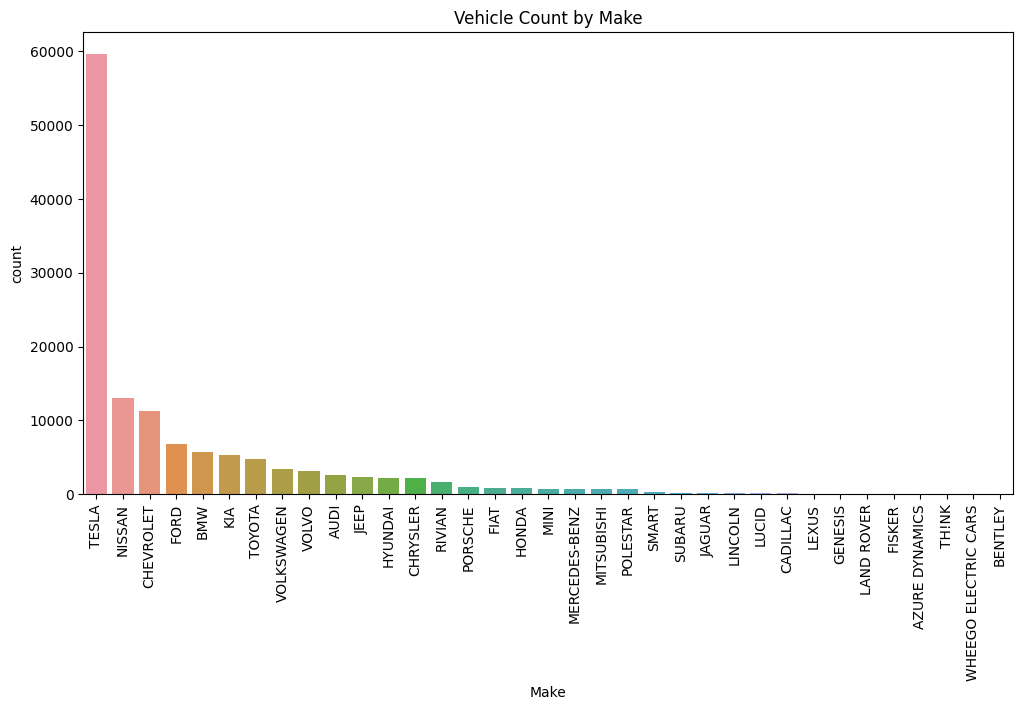

In [14]:
plt.figure(figsize=(12, 6))
sb.countplot(data=vehicle, x='Make', order=vehicle['Make'].value_counts().index)
plt.title('Vehicle Count by Make')
plt.xticks(rotation=90)
plt.show()

# Create a box plot of Model Year by County

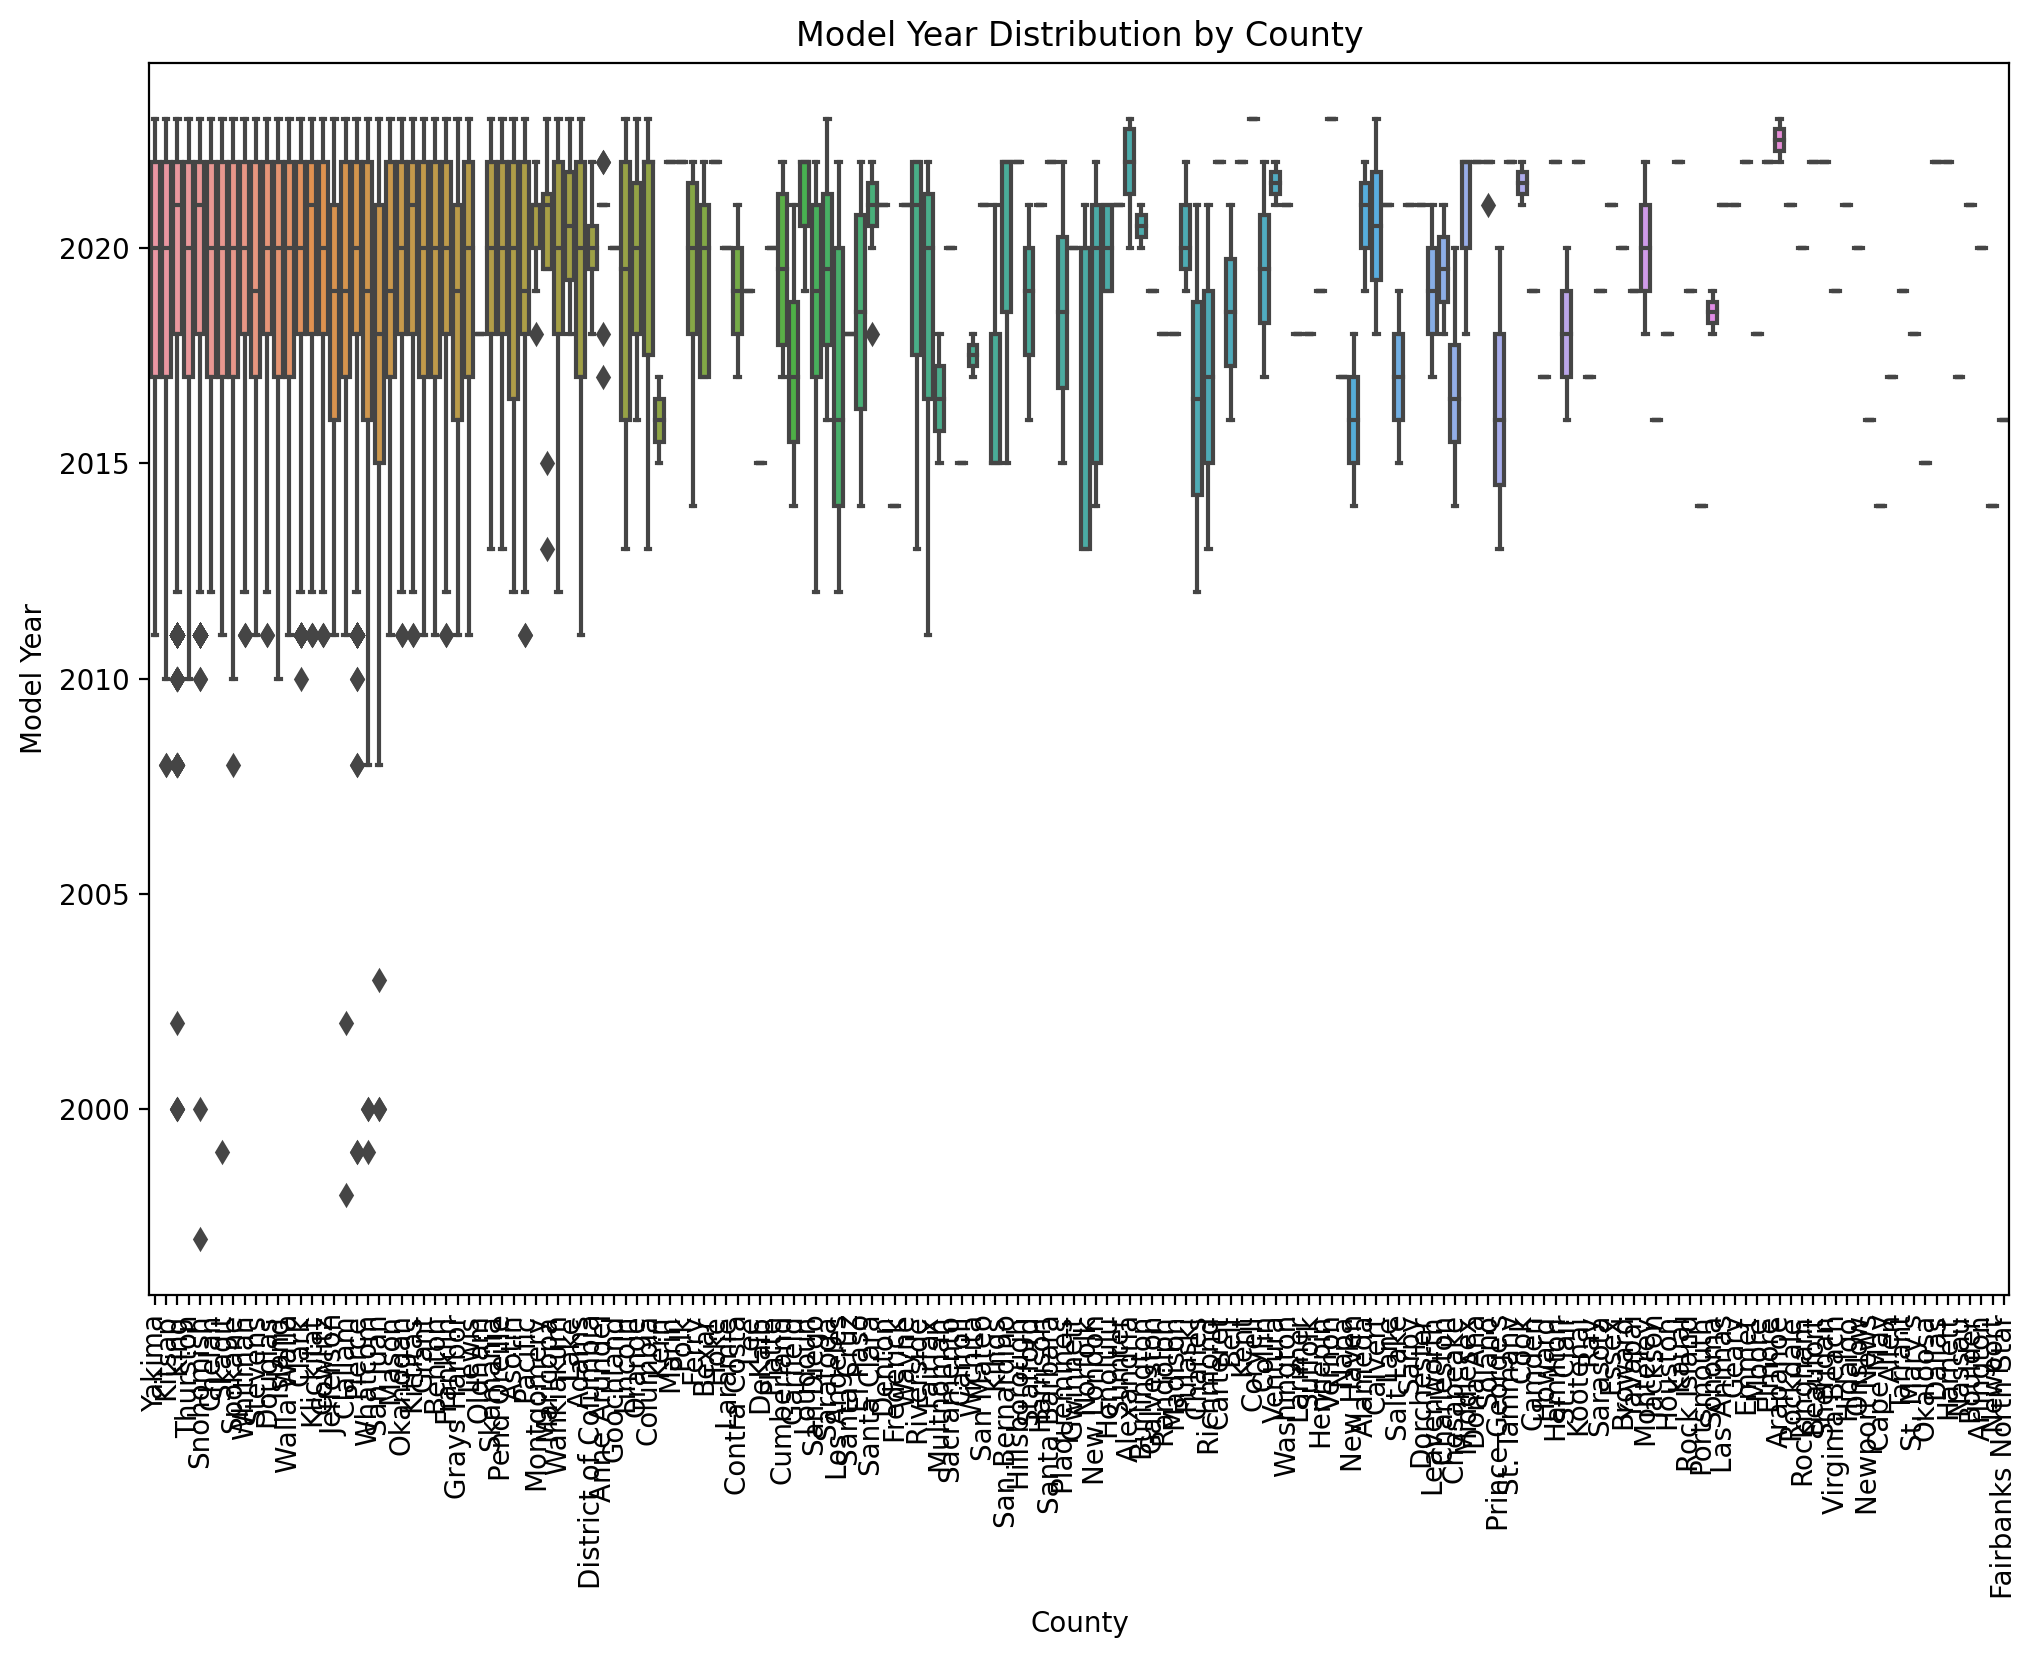

In [15]:
plt.figure(figsize=(12, 8),dpi=200)
sb.boxplot(data=vehicle, x='County', y='Model Year')
plt.title('Model Year Distribution by County')
plt.xticks(rotation=90)
plt.show()

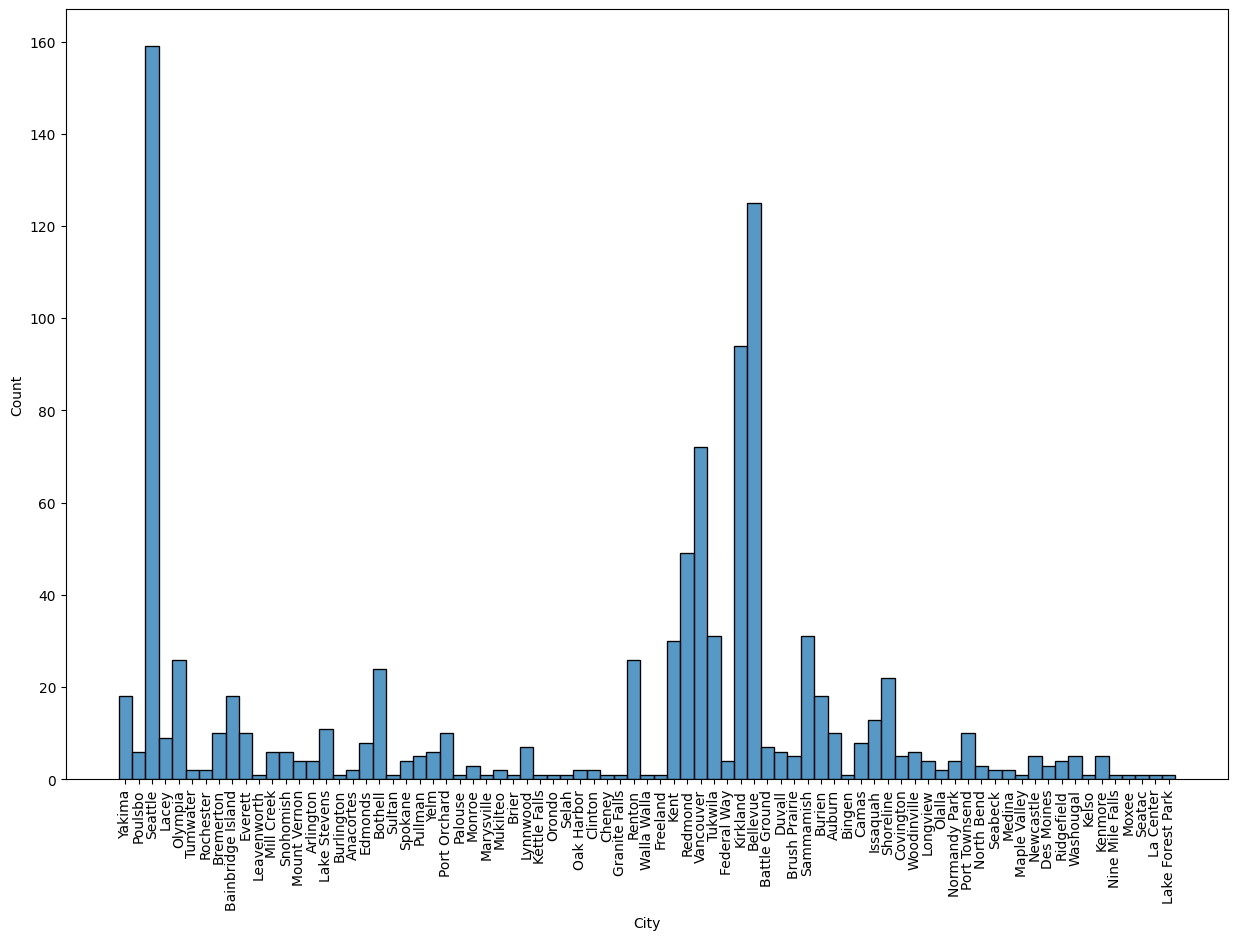

In [16]:
plt.figure(figsize=(15 , 10 ))
sb.histplot(vehicle['City'][0:1000])
plt.xticks(rotation ="vertical")
plt.show()

# Filter relevant columns for analysis

In [18]:
vehicle_market= vehicle[['Make', 'Electric Vehicle Type', 'Model']]
# Calculate the count of vehicles by Make and Electric Vehicle Type
market_share = vehicle_market.groupby(['Make', 'Electric Vehicle Type']).size().reset_index(name='Count')

In [19]:
# Calculate the total count of vehicles by Make
total_vehicles = market_share.groupby('Make')['Count'].sum().reset_index(name='Total')

# Calculate the market share percentage for each Electric Vehicle Type
market_share = market_share.merge(total_vehicles, on='Make')
market_share['Market Share (%)'] = (market_share['Count'] / market_share['Total']) * 100

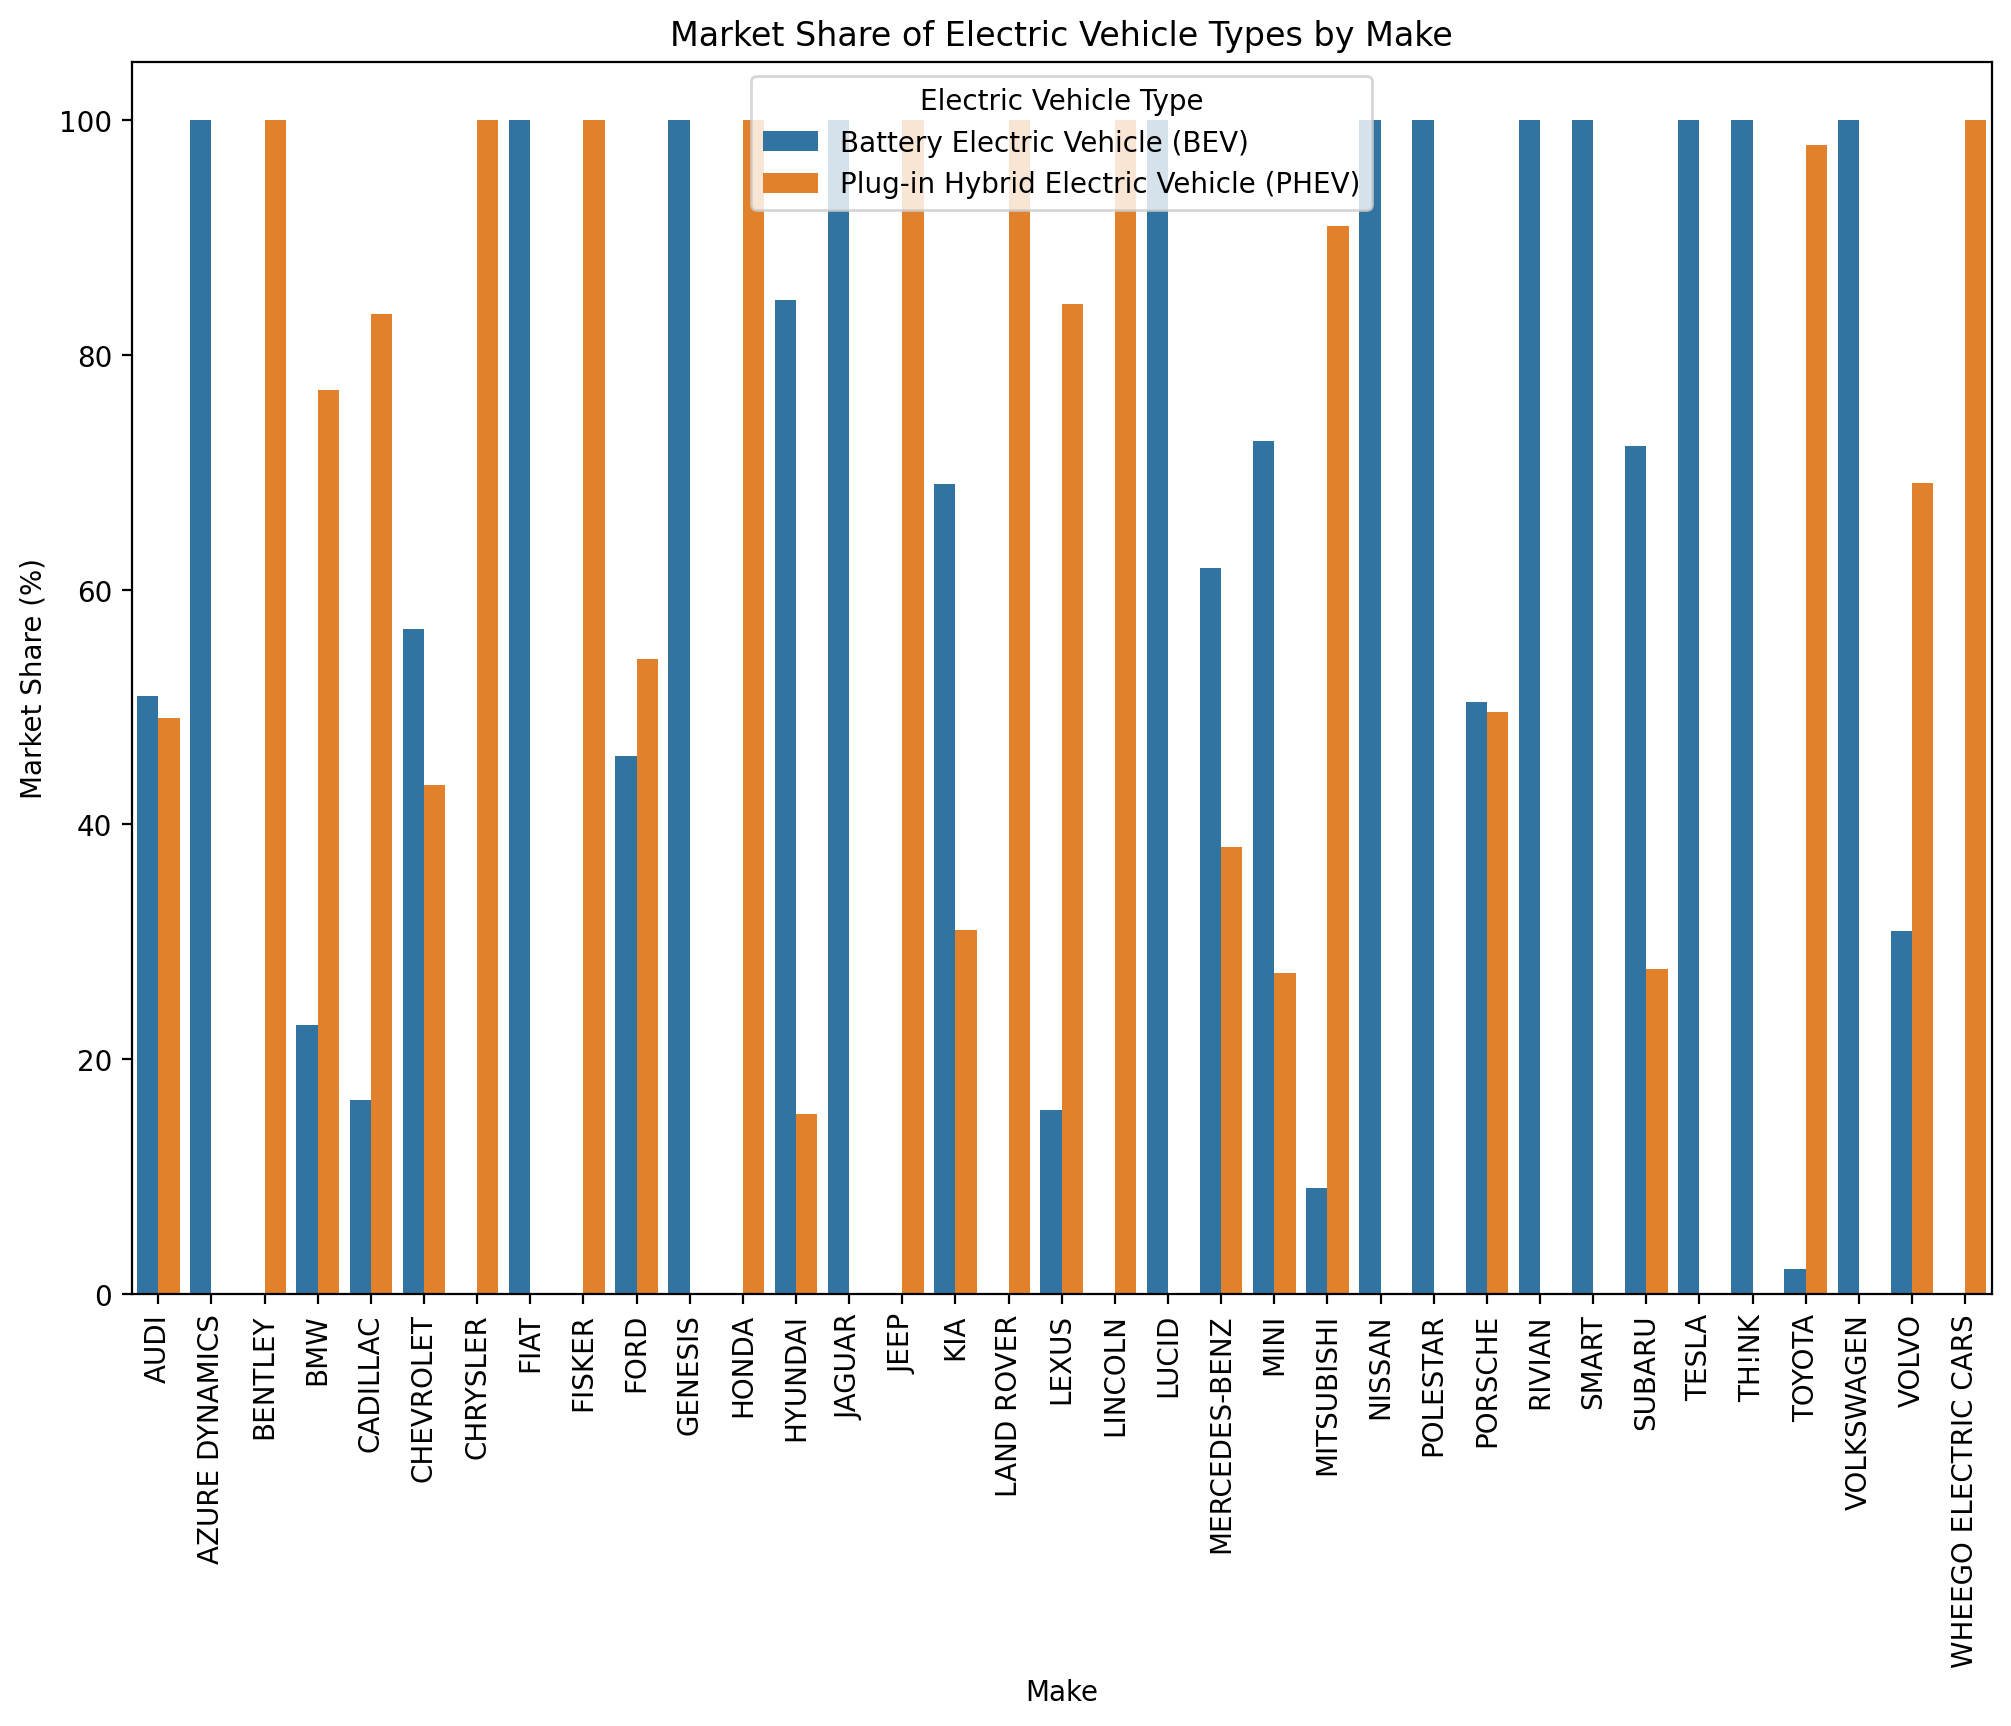

In [22]:
# Plot the market share of Electric Vehicle Types by Make
plt.figure(figsize=(12,8),dpi=200)
sb.barplot(data=market_share, x='Make', y='Market Share (%)', hue='Electric Vehicle Type')
plt.title('Market Share of Electric Vehicle Types by Make')
plt.xlabel('Make')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=90)
plt.legend(title='Electric Vehicle Type')
plt.show()

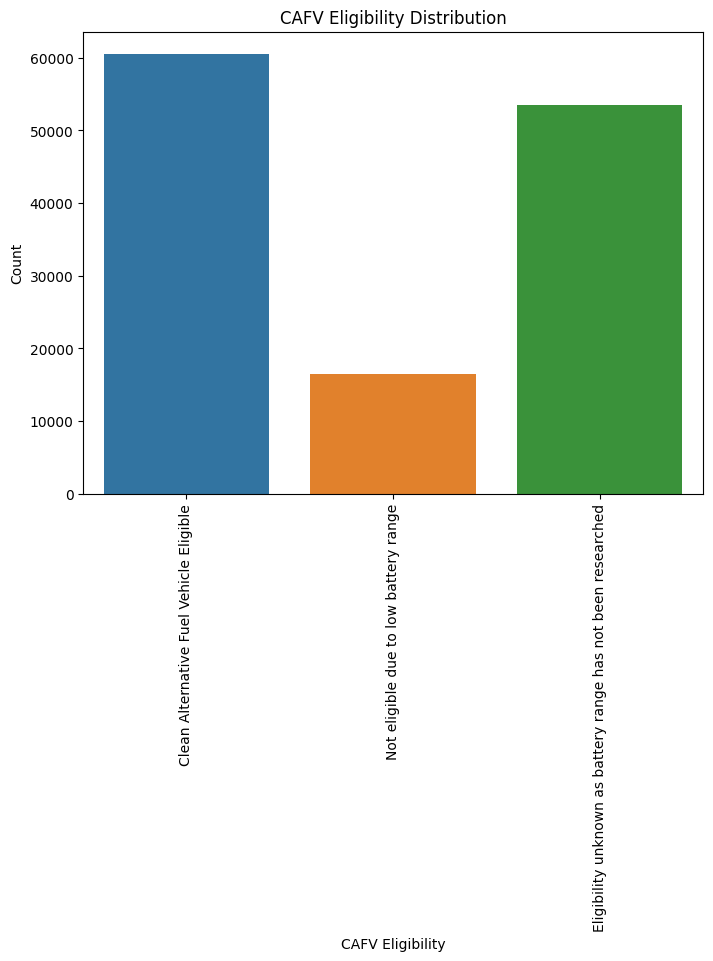

In [23]:
# Analyze CAFV Eligibility
caf_eligibility_counts = vehicle['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot the CAFV Eligibility distribution
plt.figure(figsize=(8, 6))
sb.countplot(data=vehicle, x='Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.title('CAFV Eligibility Distribution')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

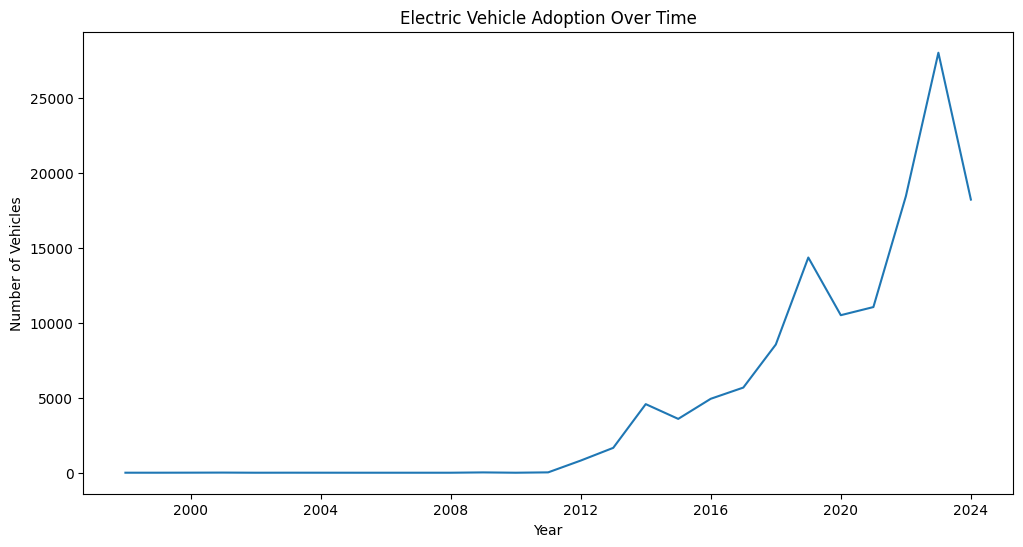

In [30]:
# Set 'Model Year' as the index
vehicle.set_index('Model Year', inplace=True)

# Group the data by year and count the number of vehicles
yearly_counts = vehicle.resample('Y').size()

# Plot the time series of electric vehicle adoption
plt.figure(figsize=(12, 6))
sb.lineplot(data=yearly_counts)
plt.title('Electric Vehicle Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.show()